<p style="background-color: #8a4baf; color: white; font-size: 25px; padding: 25px; border-radius: 15px; text-align: center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Flowers Recognition with CNN and Transfer Learning</p>

## Contents

1. [Introduction](#1.-Introduction)
2. [Importing the Libraries](#2.-importing-the-libraries)
3. [Read the Data Set](#3.-read-the-data-set)
4. [Train | Test Split](#4.-train--test-split)
5. [Recognizing and Visualizing Data](#5.-recognizing-and-visualizing-data)
6. [Preparing the Data for the Model](#6.-preparing-the-data-for-the-model)

   6.1 [Data Augmentation](#6.1-data-augmentation)
   
7. [CNN Model](#7.-cnn-model)
8. [Transfer Learning Models](#8.-transfer-learning-models)

   8.1 [MobilNetV2 Model](#8.1-mobilenetv2-model)
   
   8.2 [VGG16 Model](#8.2-vgg16-model)
   

# Introduction

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.


The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

The data collection is based on scraped data from flickr, google images, and yandex images.

# Importing the Libraries

In [33]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread



import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [34]:
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing import image

# Read Data Set

In [35]:
pwd

'/kaggle/working'

In [36]:
my_data_dir='/kaggle/working/path/to/your'

# Train | Test Split

In [37]:


# Directory where your data is located
data_dir = "/kaggle/input/flowers-recognition/flowers"

# Labels
labels = ["daisy", "dandelion", "rose", "sunflower", "tulip"]


file_names = []
labels_list = []

# Collect filenames and tags under each tag
for label in labels:
    label_dir = os.path.join(data_dir, label)
    for file_name in os.listdir(label_dir):
        file_names.append(os.path.join(label, file_name))
        labels_list.append(label)

# Split the data set into train and test
train_file_names, test_file_names, train_labels, test_labels = train_test_split(
    file_names, labels_list, test_size=0.2, random_state=42)

print("Train veri seti sayısı:", len(train_file_names))
print("Test veri seti sayısı:", len(test_file_names))

Train veri seti sayısı: 3453
Test veri seti sayısı: 864


In [38]:


train_dir = my_data_dir+'/train_data'
test_dir = my_data_dir+'/test_data'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Saving the train dataset
for file_name, label in zip(train_file_names, train_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(train_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

# Saving the test dataset
for file_name, label in zip(test_file_names, test_labels):
    src_file = os.path.join(data_dir, file_name)
    dest_dir = os.path.join(test_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(src_file, os.path.join(dest_dir, os.path.basename(file_name)))

In [39]:
os.listdir(my_data_dir)

['test_data', 'train_data']

In [40]:
train_path = my_data_dir+'/train_data/'
test_path = my_data_dir+'/test_data/'

In [41]:
os.listdir(train_path)

['tulip', 'dandelion', 'daisy', 'sunflower', 'rose']

In [42]:
os.listdir(test_path)

['tulip', 'dandelion', 'daisy', 'sunflower', 'rose']

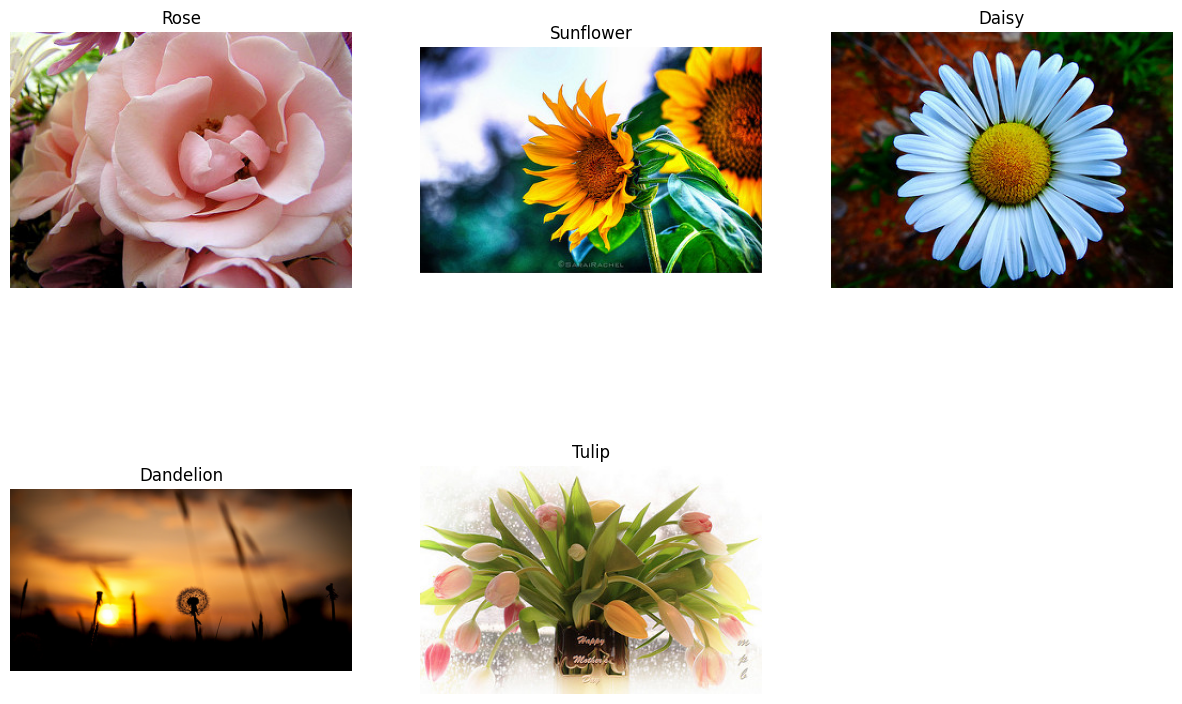

In [43]:

train_path = my_data_dir+'/train_data/'
flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']

plt.figure(figsize=(15, 10))

for i, flower in enumerate(flowers, start=1):
    # Construct the directory path for each flower type
    flower_path = os.path.join(train_path, flower)
    # Get the fifth image
    sample_image_name = os.listdir(flower_path)[5]
    sample_image_path = os.path.join(flower_path, sample_image_name)
    
    # Display the image
    plt.subplot(2, 3, i)
    plt.imshow(plt.imread(sample_image_path))
    plt.title(flower.capitalize())  
    plt.axis('off')  

plt.show()

In [44]:
os.listdir(train_path+'tulip')[17]

'15516715153_08abc9bb20_n.jpg'

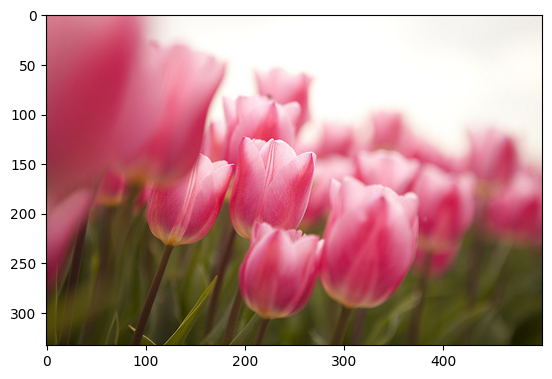

In [45]:
para_cell = train_path+'tulip'+'/4590702749_e1df8e0c1b.jpg'
para_img= imread(para_cell)
plt.imshow(para_img)

In [46]:
os.listdir(train_path+'rose')[17]



'394990940_7af082cf8d_n.jpg'

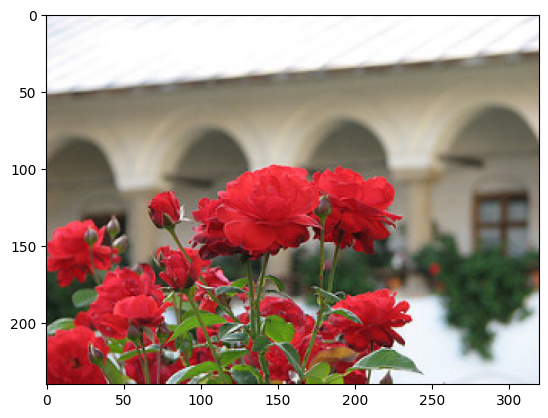

In [47]:
para_cell2 = train_path+'rose'+'/1461381091_aaaa663bbe_n.jpg'
para_img2= imread(para_cell2)
plt.imshow(para_img2)

## Counting the Number of Files in Each Flower Category

In [48]:
roses =len(os.listdir(train_path+'rose'))
sunflowers =len(os.listdir(train_path+'sunflower'))
daisy =len(os.listdir(train_path+'daisy'))
dandelion =len(os.listdir(train_path+'dandelion'))
tulips =len(os.listdir(train_path+'tulip'))


print("Number of files in Roses folder:", roses)
print("Number of files in Sunflowers folder:", sunflowers)
print("Number of files in Daisy folder:", daisy)
print("Number of files in Dandelion folder:", dandelion)
print("Number of files in Tulips folder:", tulips)

Number of files in Roses folder: 629
Number of files in Sunflowers folder: 598
Number of files in Daisy folder: 602
Number of files in Dandelion folder: 829
Number of files in Tulips folder: 795


## Randomly Selecting Images and Displaying Their Shapes from Each Category Folder

In [50]:
import random

# Get the lists of images in each folder
roses_images = os.listdir(train_path + 'rose')
sunflowers_images = os.listdir(train_path + 'sunflower')
daisy_images = os.listdir(train_path + 'daisy')
dandelion_images = os.listdir(train_path + 'dandelion')
tulips_images = os.listdir(train_path + 'tulip')

# Select a random image from each folder
roses_image = random.choice(roses_images)
sunflowers_image = random.choice(sunflowers_images)
daisy_image = random.choice(daisy_images)
dandelion_image = random.choice(dandelion_images)
tulips_image = random.choice(tulips_images)

# Get the dimensions of each image
roses_img = imread(train_path + 'rose/' + roses_image)
roses_height, roses_width, _ = roses_img.shape

sunflowers_img = imread(train_path + 'sunflower/' + sunflowers_image)
sunflowers_height, sunflowers_width, _ = sunflowers_img.shape

daisy_img = imread(train_path + 'daisy/' + daisy_image)
daisy_height, daisy_width, _ = daisy_img.shape

dandelion_img = imread(train_path + 'dandelion/' + dandelion_image)
dandelion_height, dandelion_width, _ = dandelion_img.shape

tulips_img = imread(train_path + 'tulip/' + tulips_image)
tulips_height, tulips_width, _ = tulips_img.shape

# Display the dimensions
print("Roses image shape:", (roses_height, roses_width))
print("Sunflowers image shape:", (sunflowers_height, sunflowers_width))
print("Daisy image shape:", (daisy_height, daisy_width))
print("Dandelion image shape:", (dandelion_height, dandelion_width))
print("Tulips image shape:", (tulips_height, tulips_width))

Roses image shape: (331, 500)
Sunflowers image shape: (215, 320)
Daisy image shape: (180, 240)
Dandelion image shape: (240, 320)
Tulips image shape: (333, 500)


## Determining Common Image Shape

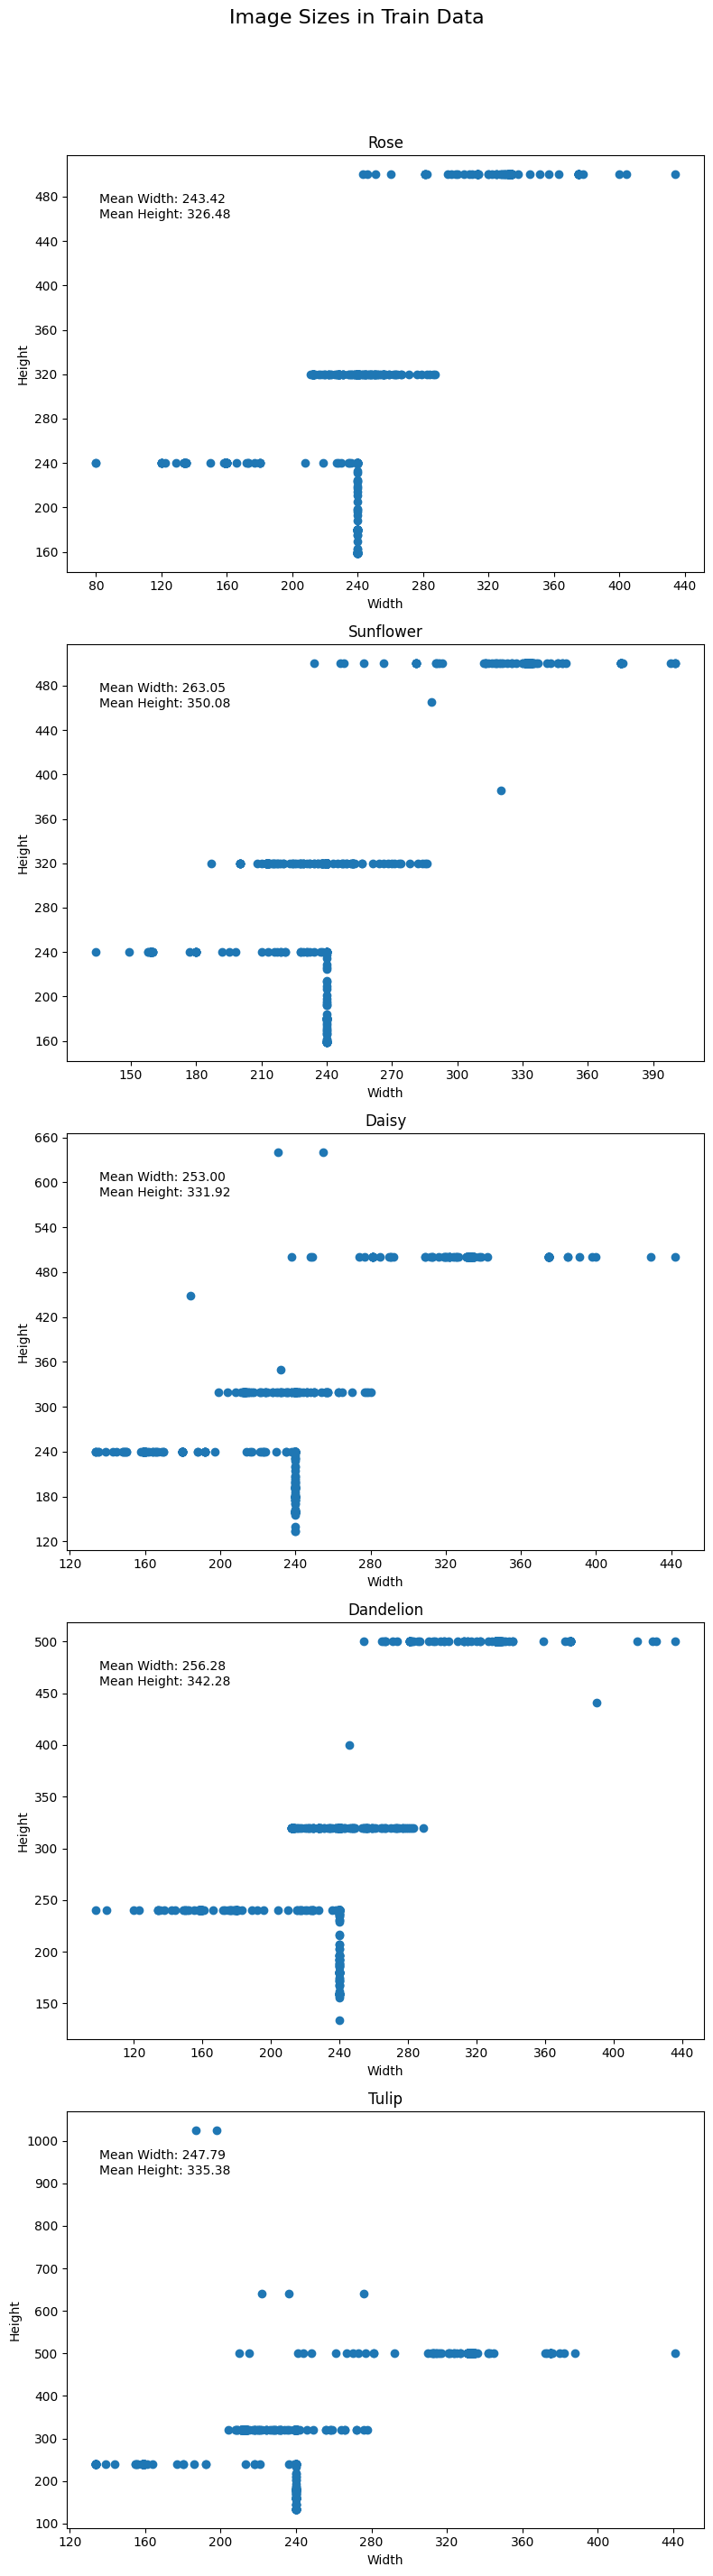

In [51]:
#import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


fig, axs = plt.subplots(len(flowers), figsize=(8, 6 * len(flowers)))

for i, flower in enumerate(flowers):
   
    flower_path = os.path.join(train_directory, flower)
    
   
    sizes = []
    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        sizes.append(img.shape)
    
    
    axs[i].scatter([size[0] for size in sizes], [size[1] for size in sizes], label=flower)
    axs[i].set_title(flower.capitalize())
    axs[i].set_xlabel('Width')
    axs[i].set_ylabel('Height')
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    axs[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    
   
    mean_width = np.mean([size[0] for size in sizes])
    mean_height = np.mean([size[1] for size in sizes])
    axs[i].text(0.05, 0.85, f'Mean Width: {mean_width:.2f}\nMean Height: {mean_height:.2f}', transform=axs[i].transAxes)

plt.suptitle('Image Sizes in Train Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Determining the shapes of images

In [52]:

train_directory = my_data_dir+'/train_data/'


flowers = ['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


all_widths = []
all_heights = []

for flower in flowers:
   
    flower_path = os.path.join(train_directory, flower)
    

    for image_file in os.listdir(flower_path):
        image_path = os.path.join(flower_path, image_file)
        img = plt.imread(image_path)
        height, width, _ = img.shape
        all_widths.append(width)
        all_heights.append(height)


mean_width = int(np.mean(all_widths))
mean_height = int(np.mean(all_heights))

# Creating a common shape
common_shape = (mean_height, mean_width)

print("Common Shape:", common_shape)

Common Shape: (252, 337)


In [53]:
image_shape = (299, 299,3)

- (224, 224, 3): This shape is commonly used for pre-trained CNN models on ImageNet. Many models like VGG, ResNet, and Inception use this input shape.
- (299, 299, 3): This shape is preferred for some models like Inception V3 developed by Google.
- (32, 32, 3) or (64, 64, 3): Smaller input shapes may be preferred for small datasets or situations requiring faster computation.

- I preferred to determine a shape by looking at the average shape of flowers in each flower category file.

# Preparing the Data for the model

In [54]:
para_img.max()

255

In [55]:
para_img.min()

#we have to scale

0

## Data Augmentation

In [102]:
#ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3,
    fill_mode='nearest'
)

#test_datagen = ImageDataGenerator(rescale=1./255)

In [103]:
img_height = 299
img_width = 299
batch_size = 32

In [104]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    subset="training",
    class_mode='categorical'
)

validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
     color_mode='rgb',
    subset="validation",
    class_mode='categorical'
)


#seed=123,


Found 2420 images belonging to 5 classes.
Found 1033 images belonging to 5 classes.


# CNN Model

In [71]:
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape,  activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(5, activation='softmax'))

          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])   

early_stop = EarlyStopping(monitor='val_loss',patience=8)



In [72]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 33, 33, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,461,573 (66.61 MB)

 Trainable params: 17,461,573 (66.61 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
results = model.fit(train_data,epochs=40,
                    validation_data=validation_data,
                    callbacks=[early_stop])

Epoch 1/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.3403 - loss: 1.4455

W0000 00:00:1715602797.659673     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 76s 940ms/step - accuracy: 0.3407 - loss: 1.4447 - val_accuracy: 0.4046 - val_loss: 1.2791
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 890ms/step - accuracy: 0.4344 - loss: 1.2823 - val_accuracy: 0.4337 - val_loss: 1.2145
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 894ms/step - accuracy: 0.4450 - loss: 1.2129 - val_accuracy: 0.4869 - val_loss: 1.1560
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 886ms/step - accuracy: 0.5092 - loss: 1.1344 - val_accuracy: 0.5324 - val_loss: 1.1068
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 884ms/step - accuracy: 0.5122 - loss: 1.1315 - val_accuracy: 0.5257 - val_loss: 1.0877
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 888ms/step - accuracy: 0.5286 - loss: 1.0863 - val_accuracy: 0.5576 - val_loss: 1.0825
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 892ms/step - accuracy: 0.5736 - loss: 1.0430 - val_accuracy: 0.5537 - val_loss: 1.1174
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 881ms/step - accuracy: 0.5814 - loss: 1.0216 - val_accuracy: 0.571

In [75]:
summary = pd.DataFrame(model.history.history)
summary.tail(10)

,accuracy,loss,val_accuracy,val_loss
30,0.729,0.742,0.730,0.748
31,0.748,0.693,0.742,0.712
32,0.744,0.687,0.735,0.764
33,0.740,0.697,0.722,0.731
34,0.753,0.683,0.692,0.864
35,0.746,0.687,0.709,0.755
36,0.751,0.656,0.744,0.712
37,0.752,0.671,0.694,0.794
38,0.764,0.646,0.715,0.749
39,0.764,0.639,0.736,0.720


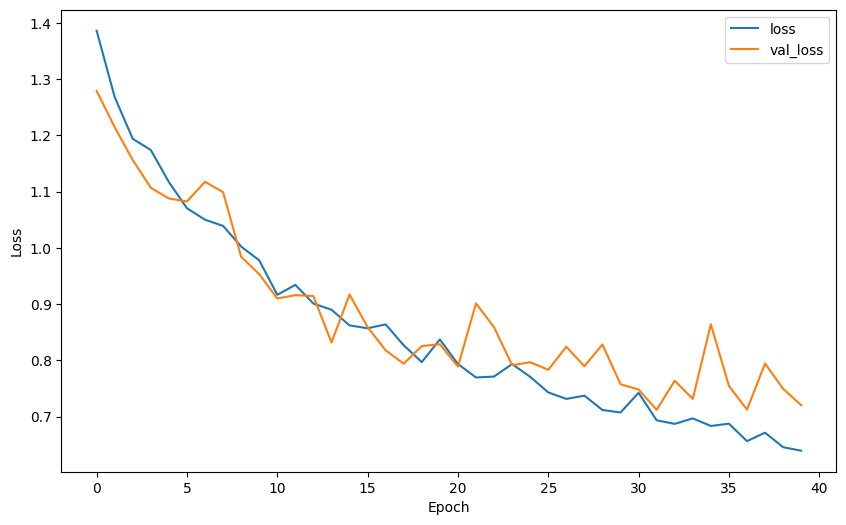

In [76]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

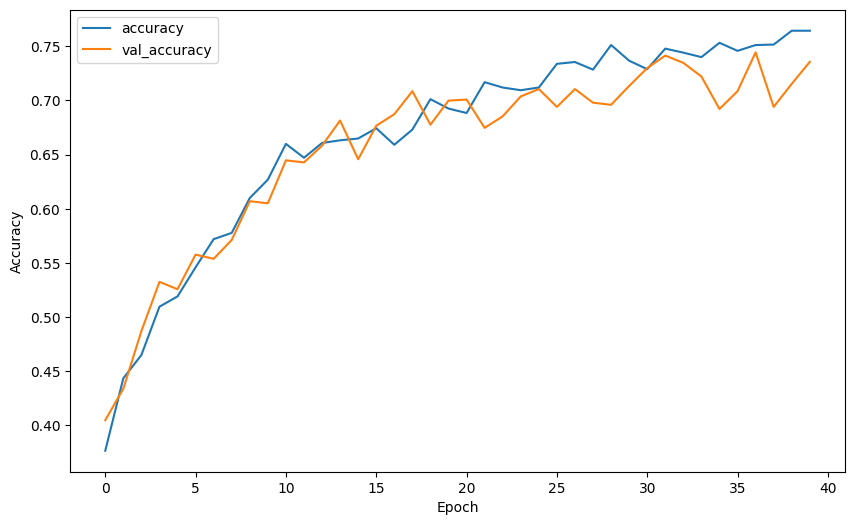

In [77]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [78]:
model.evaluate(train_data)

76/76 ━━━━━━━━━━━━━━━━━━━━ 50s 654ms/step - accuracy: 0.7777 - loss: 0.6163


[0.6059488654136658, 0.7859504222869873]

In [79]:
model.evaluate(validation_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 647ms/step - accuracy: 0.7518 - loss: 0.7052


[0.7228077054023743, 0.7424975633621216]

In [80]:
pred_probabilities = model.predict(validation_data)
pred_probabilities

 1/33 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step

W0000 00:00:1715605850.048212     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 636ms/step


array([[2.72712577e-02, 9.72334504e-01, 1.52569726e-06, 1.52299792e-04,
        2.40417881e-04],
       [9.99671876e-01, 1.19933728e-04, 1.30650631e-04, 1.54450136e-05,
        6.20572973e-05],
       [9.36218724e-02, 4.19693291e-02, 5.09430230e-01, 2.12460198e-02,
        3.33732545e-01],
       ...,
       [7.34625682e-02, 5.91381975e-02, 1.15601316e-01, 1.25364047e-02,
        7.39261508e-01],
       [1.63533092e-01, 6.48470083e-03, 5.65457940e-01, 4.46822029e-03,
        2.60056078e-01],
       [4.19216514e-01, 1.38531670e-01, 2.37244964e-01, 5.94534278e-02,
        1.45553425e-01]], dtype=float32)

In [81]:
predictions = pred_probabilities > 0.5
predictions[:50]

array([[False,  True, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [ True, False, False, Fal

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


# Transfer Learning Models

## MobilNetV2 Model

In [84]:
from tensorflow.keras.applications import MobileNetV2

# MobilNetV2 model
mobilnetv2_model = Sequential() 

base_model =tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= "imagenet")

for layer in base_model.layers:
    layer.trainable = False

mobilnetv2_model.add(base_model)
mobilnetv2_model.add(Flatten())
mobilnetv2_model.add(Dense(128, activation='relu'))
mobilnetv2_model.add(Dropout(0,3))
mobilnetv2_model.add(Dense(256, activation='relu'))
mobilnetv2_model.add(Dense(5, activation='softmax'))
mobilnetv2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=10)


In [85]:
mobilnetv2_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [86]:
results = mobilnetv2_model.fit(train_data, epochs=25, validation_data=validation_data, callbacks=[early_stop])

Epoch 1/25
 2/76 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.2109 - loss: 1.5982  

W0000 00:00:1715606214.644868     191 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


48/76 ━━━━━━━━━━━━━━━━━━━━ 18s 669ms/step - accuracy: 0.5658 - loss: 1.0460

W0000 00:00:1715606245.970683     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.6275 - loss: 0.9246

W0000 00:00:1715606264.998695     190 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 957ms/step - accuracy: 0.6291 - loss: 0.9214 - val_accuracy: 0.7928 - val_loss: 0.5834
Epoch 2/25


W0000 00:00:1715606286.438986     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 70s 869ms/step - accuracy: 0.8518 - loss: 0.4048 - val_accuracy: 0.8470 - val_loss: 0.4520
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 872ms/step - accuracy: 0.8800 - loss: 0.3021 - val_accuracy: 0.8354 - val_loss: 0.4836
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 881ms/step - accuracy: 0.9023 - loss: 0.2527 - val_accuracy: 0.8558 - val_loss: 0.4511
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 70s 866ms/step - accuracy: 0.9068 - loss: 0.2579 - val_accuracy: 0.8422 - val_loss: 0.4933
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 874ms/step - accuracy: 0.9090 - loss: 0.2438 - val_accuracy: 0.8509 - val_loss: 0.4282
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 878ms/step - accuracy: 0.9321 - loss: 0.1889 - val_accuracy: 0.8403 - val_loss: 0.4849
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 876ms/step - accuracy: 0.9219 - loss: 0.2123 - val_accuracy: 0.8383 - val_loss: 0.5052
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 879ms/step - accuracy: 0.9426 - loss: 0.1464 - val_accuracy: 0.854

In [87]:
summary = pd.DataFrame(mobilnetv2_model.history.history)
summary.head(15)

,accuracy,loss,val_accuracy,val_loss
0,0.750,0.678,0.793,0.583
1,0.856,0.394,0.847,0.452
2,0.875,0.326,0.835,0.484
3,0.906,0.270,0.856,0.451
4,0.909,0.246,0.842,0.493
5,0.911,0.239,0.851,0.428
6,0.925,0.202,0.840,0.485
7,0.932,0.186,0.838,0.505
8,0.935,0.171,0.855,0.458
9,0.946,0.158,0.839,0.521


In [88]:
mobilnetv2_model.evaluate(train_data)

76/76 ━━━━━━━━━━━━━━━━━━━━ 52s 679ms/step - accuracy: 0.9613 - loss: 0.0940


W0000 00:00:1715607438.440239     188 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.09005862474441528, 0.968595027923584]

In [89]:
mobilnetv2_model.evaluate(validation_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 641ms/step - accuracy: 0.8272 - loss: 0.6182


[0.5990853905677795, 0.8383349180221558]

## VCG16 Model

In [91]:
from tensorflow.keras.applications import VGG16

# VGG16 modeli
vgg16_model = Sequential() 

base_model =tf.keras.applications.VGG16(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= "imagenet")


for layer in base_model.layers:
    layer.trainable = False

vgg16_model.add(base_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(5, activation='softmax'))
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 



early_stop = EarlyStopping(monitor='val_loss', patience=4)
results = vgg16_model.fit(train_data, 
                          epochs=25, 
                          validation_data=validation_data, 
                          callbacks=[early_stop])



Epoch 1/25


W0000 00:00:1715607595.727557     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4271 - loss: 1.3752

W0000 00:00:1715607681.527407     189 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4288 - loss: 1.3724 - val_accuracy: 0.6931 - val_loss: 0.9083
Epoch 2/25


W0000 00:00:1715607723.359014     190 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 893ms/step - accuracy: 0.7216 - loss: 0.8274 - val_accuracy: 0.7009 - val_loss: 0.7894
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 894ms/step - accuracy: 0.7492 - loss: 0.7049 - val_accuracy: 0.7299 - val_loss: 0.7459
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 892ms/step - accuracy: 0.7745 - loss: 0.6224 - val_accuracy: 0.7570 - val_loss: 0.6628
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 72s 893ms/step - accuracy: 0.8007 - loss: 0.5666 - val_accuracy: 0.7551 - val_loss: 0.6656
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 897ms/step - accuracy: 0.7819 - loss: 0.5740 - val_accuracy: 0.7599 - val_loss: 0.6729
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 904ms/step - accuracy: 0.8145 - loss: 0.5246 - val_accuracy: 0.7648 - val_loss: 0.6674
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 898ms/step - accuracy: 0.8241 - loss: 0.4909 - val_accuracy: 0.7677 - val_loss: 0.6148
Epoch 9/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 899ms/step - accuracy: 0.8134 - loss: 0.4855 - val_accuracy: 0.776

In [92]:
vgg16_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,510,353 (59.17 MB)

 Trainable params: 265,221 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 530,444 (2.02 MB)

In [93]:
summary = pd.DataFrame(vgg16_model.history.history)
summary.head(15)

,accuracy,loss,val_accuracy,val_loss
0,0.557,1.162,0.693,0.908
1,0.723,0.801,0.701,0.789
2,0.751,0.688,0.730,0.746
3,0.780,0.615,0.757,0.663
4,0.797,0.571,0.755,0.666
5,0.796,0.562,0.760,0.673
6,0.811,0.525,0.765,0.667
7,0.824,0.484,0.768,0.615
8,0.822,0.485,0.776,0.586
9,0.827,0.471,0.752,0.682


In [94]:
vgg16_model.evaluate(train_data)

76/76 ━━━━━━━━━━━━━━━━━━━━ 49s 648ms/step - accuracy: 0.8666 - loss: 0.3652


[0.3461373448371887, 0.8714876174926758]

In [95]:
vgg16_model.evaluate(validation_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 713ms/step - accuracy: 0.7720 - loss: 0.6549


[0.6065126657485962, 0.7812197208404541]